# Import library

In [ ]:
import pandas as pd
import json
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import collections
from PIL import Image

In [ ]:
!pip install tqdm -q

In [ ]:
! pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
!rm /content/sample_data/california_housing_test.csv
!rm /content/sample_data/california_housing_train.csv
!rm /content/sample_data/mnist_test.csv
!rm /content/sample_data/mnist_train_small.csv

rm: cannot remove '/content/sample_data/california_housing_test.csv': No such file or directory
rm: cannot remove '/content/sample_data/california_housing_train.csv': No such file or directory
rm: cannot remove '/content/sample_data/mnist_test.csv': No such file or directory
rm: cannot remove '/content/sample_data/mnist_train_small.csv': No such file or directory


# Download COCO dataset API

In [ ]:
data = {"username":"morningsky","key":"c056b3aee003a5ea6c16f1d800aca4da"}
json_data = json.dumps(data)

file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c thai-language-image-captioning

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 98% 442M/453M [00:02<00:00, 126MB/s]
100% 453M/453M [00:03<00:00, 156MB/s]


In [ ]:
!kaggle datasets download -d awsaf49/coco-2017-dataset

 62% 15.6G/25.0G [03:29<02:05, 80.2MB/s]
User cancelled operation


In [ ]:
! unzip /content/coco-2017-dataset.zip

Archive:  /content/coco-2017-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/coco-2017-dataset.zip or
        /content/coco-2017-dataset.zip.zip, and cannot find /content/coco-2017-dataset.zip.ZIP, period.


In [ ]:
!rm /content/coco-2017-dataset.zip

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir train
! unzip /content/thai-language-image-captioning.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  /content/thai-language-image-captioning.zip
replace train/ipu24_v0.4.1_coco.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!rm /content/thai-language-image-captioning.zip

In [ ]:
with open(f'/content/train/ipu24_v0.4.1_coco.json', 'r') as f:
    data = json.load(f)
data = pd.DataFrame({'path':data.keys(), 'annotate':data.values()})

In [ ]:
data

,path,annotate
0,train2017/000000373716,[ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับส...
1,train2017/000000196888,[สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสี...
2,train2017/000000282238,[ไปสัญญาณจราจร 3 อันติดอยู่บนเสาไฟสีดำแสดงสัญญ...
3,train2017/000000267035,[จานสีขาวจานนึงขบวนการนั้นมี โดนัทสอดไส้ทูน่าอ...
4,train2017/000000214481,[ห้องครัวห้องนึงที่มีตู้เก็บของเป็นสีน้ำตาลวาง...
...,...,...
119282,val2017/000000348012,[กรรไกรสีดำอันหนึ่งถูกวางไว้อยู่บนสก๊อตเทปใสม้...
119283,val2017/000000468632,[คนใส่เสื้อสีเทาเล่นจานร่อนสีขาว อยู่บนสนามฟุต...
119284,val2017/000000315257,[นกที่มีปากสีดำตัวสีขาวปีกสีน้ำเงินดำเกาะอยู่บ...
119285,val2017/000000338219,[ผู้ชายใส่เสื้อลายสกอตสีขาวดำ เดินอยู่บนสนามหญ...


In [ ]:
data['path'] = data['path'].apply(lambda x: 'coco2017/' + x + '.jpg')

In [ ]:
data.head()

,path,annotate
0,coco2017/train2017/000000373716.jpg,[ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับส...
1,coco2017/train2017/000000196888.jpg,[สีน้ำตาลตัวเล็กกำลังกินอาหารอยู่บนจานกระดาษสี...
2,coco2017/train2017/000000282238.jpg,[ไปสัญญาณจราจร 3 อันติดอยู่บนเสาไฟสีดำแสดงสัญญ...
3,coco2017/train2017/000000267035.jpg,[จานสีขาวจานนึงขบวนการนั้นมี โดนัทสอดไส้ทูน่าอ...
4,coco2017/train2017/000000214481.jpg,[ห้องครัวห้องนึงที่มีตู้เก็บของเป็นสีน้ำตาลวาง...


จานอาหารสีขาวใส่เค้กสีน้ำตาลเนื้อด้านในสีเหลืองวางส้มด้านบน
จานสีขาวที่เต็มไปด้วยขนมเค้กและแผ่นส้มบางบางในร้าน
รูปสามรูป เป็นรูปส้มหั่นบาง ๆ วางอยู่บนจานที่มีชิ้นเค้ก เป็นรูปมุมต่าง ๆ


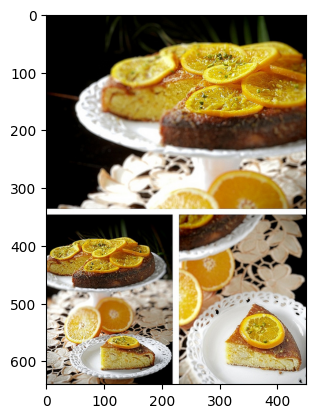

In [ ]:
idx = 50
img = plt.imread(data['path'][idx])
[print(i) for i in data['annotate'][idx]]
plt.imshow(img)
plt.show()

In [ ]:
# from PIL import Image
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# processor = TrOCRProcessor.from_pretrained("kkatiz/thai-trocr-thaigov-v2")
# model = VisionEncoderDecoderModel.from_pretrained("kkatiz/thai-trocr-thaigov-v2")

In [ ]:
# image = Image.open(data['path'][idx]).convert("RGB")
# pixel_values = processor(image, return_tensors="pt").pixel_values
# generated_ids = model.generate(pixel_values)

# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
# print(generated_text)

In [ ]:
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for val in zip(data['path'],data['annotate']):
  image_path = val[0]
  image_path_to_caption[image_path].extend(val[1])

In [ ]:
len(image_path_to_caption)

119287

In [ ]:
image_paths = list(image_path_to_caption.keys())
#random.shuffle(image_paths)

# Total 119287 images
# Each image has 3-5 captions

train_image_paths = image_paths[:]

ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม


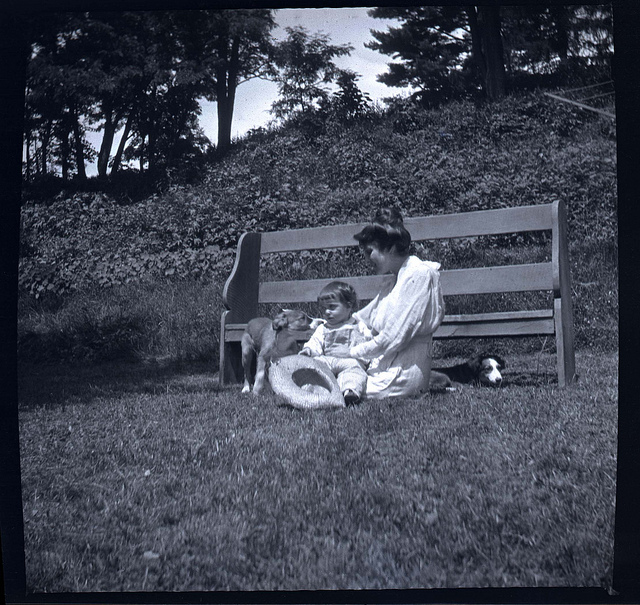

In [ ]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))


print(train_captions[0])
Image.open(img_name_vector[0])

In [ ]:
len(img_name_vector)

360216

In [ ]:
len(train_captions)

360216

In [ ]:
# def load_img(img_path):
#   img = tf.io.read_file(img_path)
#   img = tf.io.decode_jpeg(img, channel = 3)
#   img = tf.keras.layers.Resizing(299, 299)(img)
#   img = img / 255.
#   return img